Assuming we already have SAT/AP scores and the high schools distances in the file, we would only look for high schools which are in California and we want to filter those schools out first. 

In [1]:
import pandas as pd
%matplotlib inline
import pylab as plt
import numpy as np
import scipy as sc
from scipy import stats

In [2]:
data = pd.read_csv('data/with_scores.csv')
data.head()

,campus,year,school,school_num,city,county,state,country,region,ethnicity,...,ap_num_scr3,ap_num_scr4,ap_num_scr5,ap_num_test_takers,enroll12,school_name,sat_math_avg,sat_num_test_takers,sat_total_avg,sat_verbal_avg
0,Berkeley,1994.0,ABRAHAM LINCOLN HIGH SCHOOL,3833241.0,Los Angeles,Los Angeles,California,USA,Los Angeles,All,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Berkeley,1994.0,ABRAHAM LINCOLN HIGH SCHOOL,3833241.0,Los Angeles,Los Angeles,California,USA,Los Angeles,Asian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Berkeley,1994.0,ABRAHAM LINCOLN HIGH SCHOOL,3833241.0,Los Angeles,Los Angeles,California,USA,Los Angeles,Hispanic/ Latino,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Berkeley,1994.0,ABRAHAM LINCOLN HIGH SCHOOL,3833241.0,San Francisco,San Francisco,California,USA,San Francisco,All,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Berkeley,1994.0,ABRAHAM LINCOLN HIGH SCHOOL,3833241.0,San Francisco,San Francisco,California,USA,San Francisco,Asian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


check the total number of high schools in our file 

In [3]:
tot_high = len(data['school'].unique())
tot_high

2843

In [4]:
data[data['state']=='California']
data.head()
#data['ap_num_scr3'].unique()
data.columns

Index(['campus', 'year', 'school', 'school_num', 'city', 'county', 'state',
       'country', 'region', 'ethnicity', 'app_num', 'adm_num', 'enr_num',
       'app_gpa', 'adm_gpa', 'enr_gpa', 'distance', 'ap_num_scr1',
       'ap_num_scr2', 'ap_num_scr3', 'ap_num_scr4', 'ap_num_scr5',
       'ap_num_test_takers', 'enroll12', 'school_name', 'sat_math_avg',
       'sat_num_test_takers', 'sat_total_avg', 'sat_verbal_avg'],
      dtype='object')

check the total number of high schools in california 

In [5]:
num_cali_high = len(data[data['state']=='California']['school'].unique())
num_cali_high

860

In [6]:
data_cali_high = data[data['state']=='California']
data_cali_high = data_cali_high[data_cali_high['ethnicity']=='All']
data_cali_high = data_cali_high[data_cali_high['campus']!='Universitywide']
data_cali_high['yield'] = data_cali_high['enr_num'] / data_cali_high['adm_num']
data_cali_high.describe()

,year,school_num,app_num,adm_num,enr_num,app_gpa,adm_gpa,enr_gpa,distance,ap_num_scr1,...,ap_num_scr3,ap_num_scr4,ap_num_scr5,ap_num_test_takers,enroll12,sat_math_avg,sat_num_test_takers,sat_total_avg,sat_verbal_avg,yield
count,91169.000000,6.674600e+04,91169.000000,66024.000000,21719.000000,91169.000000,66024.000000,21719.000000,9.114600e+04,49039.000000,...,49034.000000,49018.000000,48957.000000,50400.000000,50940.000000,39007.000000,39167.000000,39007.000000,39007.000000,21719.000000
mean,2007.449254,2.375631e+06,31.341520,18.361338,10.056218,3.655593,3.896412,3.836844,3.546952e+05,89.274516,...,125.056634,100.421437,72.417489,262.971032,415.608049,506.368866,195.161386,1055.433849,486.445323,0.382197
std,6.690199,1.558749e+06,35.117882,18.353987,7.109786,0.213359,0.246367,0.270574,2.615003e+05,81.376657,...,110.243613,111.377053,108.810373,196.886720,199.814572,57.630394,112.922786,202.017382,51.174722,0.179135
min,1994.000000,1.002550e+05,5.000000,5.000000,5.000000,2.468333,2.798462,2.782000,6.620000e+02,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,313.023256,1.000000,676.434109,328.000000,0.052632
25%,2002.000000,1.031897e+06,10.000000,7.000000,6.000000,3.515254,3.710000,3.643750,1.133980e+05,34.000000,...,43.000000,26.000000,13.000000,118.000000,266.000000,466.000000,109.000000,927.900000,449.000000,0.250000
50%,2008.000000,1.995448e+06,19.000000,12.000000,8.000000,3.668846,3.926000,3.865714,2.616330e+05,65.000000,...,93.000000,60.000000,33.000000,216.000000,428.000000,508.930000,175.000000,1015.333333,488.000000,0.350000
75%,2013.000000,3.631017e+06,38.000000,22.000000,12.000000,3.809412,4.100769,4.054000,6.095810e+05,121.000000,...,176.000000,132.000000,82.000000,362.000000,551.000000,548.000000,260.000000,1110.340000,523.500000,0.484848
max,2017.000000,6.119309e+06,445.000000,310.000000,142.000000,4.356667,4.495000,4.430000,1.348288e+06,695.000000,...,732.000000,796.000000,1045.000000,1486.000000,1166.000000,710.300000,721.000000,2017.000000,672.300000,1.000000


check how many NaN's are there

In [7]:
count_nan = len(data_cali_high) - data_cali_high.count()
count_nan

campus                     0
year                       0
school                     0
school_num             24423
city                       0
county                     0
state                      0
country                    0
region                     0
ethnicity                  0
app_num                    0
adm_num                25145
enr_num                69450
app_gpa                    0
adm_gpa                25145
enr_gpa                69450
distance                  23
ap_num_scr1            42130
ap_num_scr2            42133
ap_num_scr3            42135
ap_num_scr4            42151
ap_num_scr5            42212
ap_num_test_takers     40769
enroll12               40229
school_name            40229
sat_math_avg           52162
sat_num_test_takers    52002
sat_total_avg          52162
sat_verbal_avg         52162
yield                  69450
dtype: int64

filter out the NaN data

In [8]:
data_cali_high = data_cali_high.dropna()
camp = ['Berkeley', 'Los Angeles', 'Davis', 'Santa Barbara', 'San Diego', 'Santa Cruz', 'Riverside', 'Irvine']
data_cali_high_camp = []
for c in camp:
    data_cali_high_camp.append(data_cali_high[data_cali_high['campus']==c])

X is to be fixed, it contains the features we want to include. We want to add AP and SAT scores later on 

In [9]:
train_cols = ['app_num', 'adm_num', 'app_gpa', 'adm_gpa', 'year', 'distance', 
                    'ap_num_scr1', 'ap_num_scr2', 'ap_num_scr3', 'ap_num_scr4', 
                    'ap_num_scr5', 'sat_math_avg', 'sat_verbal_avg', 'sat_total_avg', 
                    'ap_num_test_takers', 'sat_num_test_takers']

train_pred = 'yield'

X_camp, y_camp = [], []

X = data_cali_high[train_cols]
y = data_cali_high[train_pred]

for i in range(0, len(camp)):
    X_camp.append(data_cali_high_camp[i][train_cols])
    y_camp.append(data_cali_high_camp[i][train_pred])

In [10]:
def z_score(x):
    return (x - x.mean()) / x.std()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train_camp, X_test_camp, y_train_camp, y_test_camp = [], [], [], []

for i in range(0, len(camp)):
    X_train_camp.append([])
    X_test_camp.append([])
    y_train_camp.append([])
    y_test_camp.append([])

for i in range(0, len(camp)):
    X_train_camp[i], X_test_camp[i], y_train_camp[i], y_test_camp[i] = \
        train_test_split(X_camp[i], y_camp[i], test_size = 0.3, random_state = 0)

In [12]:
X_train = z_score(X_train)
y_train = z_score(y_train)
X_test  = z_score(X_test)
y_test  = z_score(y_test)

for i in range(0, len(camp)):
    X_train_camp[i] = z_score(X_train_camp[i])
    y_train_camp[i] = z_score(y_train_camp[i])
    X_test_camp[i]  = z_score(X_test_camp[i])
    y_test_camp[i]  = z_score(y_test_camp[i])

X_test.head()

,app_num,adm_num,app_gpa,adm_gpa,year,distance,ap_num_scr1,ap_num_scr2,ap_num_scr3,ap_num_scr4,ap_num_scr5,sat_math_avg,sat_verbal_avg,sat_total_avg,ap_num_test_takers,sat_num_test_takers
161941,-0.891271,-0.478516,-2.246830,-2.082249,-1.515223,-0.574676,-0.002161,-0.380185,-0.347568,-0.594575,-0.432492,-0.533590,-0.045185,-0.485301,-0.681693,-0.839058
128665,2.040966,0.804795,2.292432,1.545919,1.306610,1.307011,-0.542810,-0.820630,-0.034650,0.974844,2.816664,1.712788,1.601112,0.485497,0.792621,0.999536
233376,1.179749,2.125851,1.270047,0.567937,0.365999,-0.977363,-0.177872,-0.198826,0.126279,0.276411,0.334778,0.860999,1.206791,0.195790,0.513010,0.435130
50505,0.769646,1.257728,-0.130841,-0.401666,-0.339459,-0.876100,-0.313034,-0.134055,-0.481676,-0.783563,-0.761323,0.027120,-0.444713,-0.421686,-0.620687,-0.411478
225773,0.174997,0.502839,0.434314,0.270503,-1.044917,-0.022620,-0.664456,0.345253,1.574644,1.928000,0.593145,0.616131,0.577196,-0.003216,1.011226,1.658009


In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
lr = regressor.fit(X_train, y_train)

lr_camp = []

for i in range(0, len(camp)):
    lr_camp.append(regressor.fit(X_train_camp[i], y_train_camp[i]))

In [14]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['coefficient'])

In [15]:
coeff_df

,coefficient
app_num,0.099184
adm_num,-0.087961
app_gpa,0.116270
adm_gpa,-0.189640
year,0.145658
distance,-0.291568
ap_num_scr1,-0.087472
ap_num_scr2,-0.017328
ap_num_scr3,0.439389
ap_num_scr4,-0.113639


In [16]:
y_pred = lr.predict(X_test)

y_pred_camp = []

for i in range(0, len(camp)):
    y_pred_camp.append(lr_camp[i].predict(X_test_camp[i]))

In [17]:
data_result = pd.DataFrame({'Actual Yield': y_test, 'Predicted Yield': y_pred}) 
data_result.head(10)

,Actual Yield,Predicted Yield
161941,-0.789481,0.277082
128665,-0.481958,-0.831735
233376,-0.429024,-0.431547
50505,1.039706,0.737715
225773,-0.813079,-0.590803
119600,2.373187,0.137401
80072,-0.861036,-0.452622
12522,2.751107,0.010811
165661,0.924582,0.696015
58312,-1.240053,-1.094676


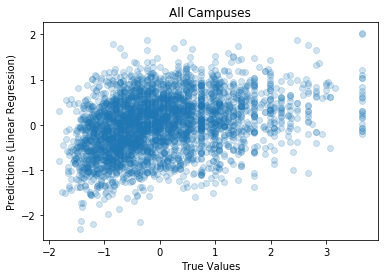

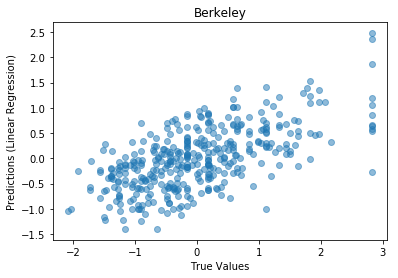

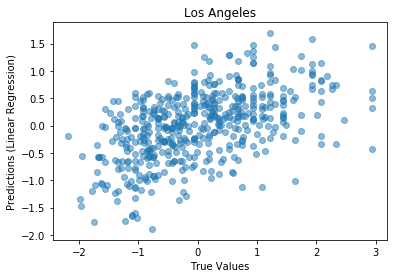

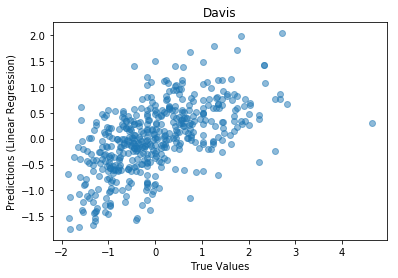

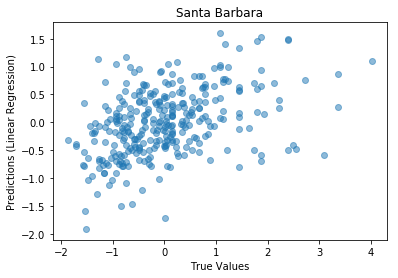

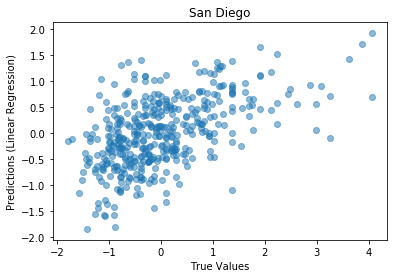

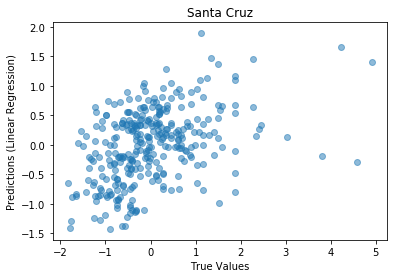

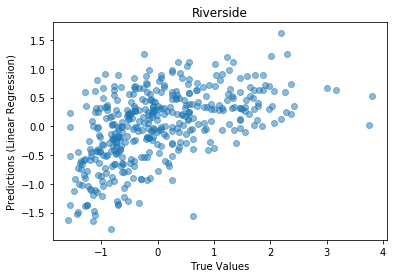

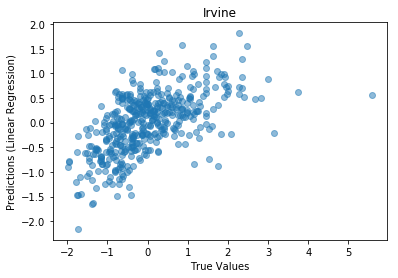

In [18]:
plt.figure(1)
plt.subplot(111)
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel('True Values')
plt.ylabel('Predictions (Linear Regression)')
plt.title('All Campuses')

for i in range(0, len(camp)):
    plt.figure(i+2)
    plt.subplot(111)
    plt.scatter(y_test_camp[i], y_pred_camp[i], alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Predictions (Linear Regression)')
    plt.title(camp[i])

In [19]:
print ('Score for all campuses:', lr.score(X_test, y_test))

for i in range(0, len(camp)):
    print ('Score for', camp[i] , lr.score(X_test_camp[i], y_test_camp[i]))

Score for all campuses: 0.027190874389852796
Score for Berkeley 0.39354270511819633
Score for Los Angeles 0.2562049798310635
Score for Davis 0.3288763048940089
Score for Santa Barbara 0.14516486703286835
Score for San Diego 0.2675090847827627
Score for Santa Cruz 0.13991786074807655
Score for Riverside 0.2706028129740081
Score for Irvine 0.34688977981098623


In [20]:
data_result.shape

(3296, 2)

In [21]:
data_cali_high['year'].unique()

array([1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012.])

Cross Validation Model. 
And here are the steps for the Cross-Validation: 
1. we reserve a sample data
2. train the model using the remaining of the datasets 
3. use the reserve sample of the test(validation) dataset. If our model delivers a positive result on the validation data, then we could go ahead with the current model. 

In [22]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(lr, X, y, cv=10)
print('Cross-validated scores:', scores)

Cross-validated scores: [-0.25065242  0.26837802  0.24293901 -0.00927646  0.10877375  0.36288639
 -0.06427114 -0.20108065  0.06846489  0.09474199]


/Users/Nelson/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Text(0,0.5,'Predictions (10-fold cross-validation)')

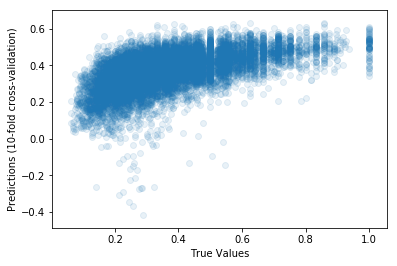

In [23]:
y_cross_pred = cross_val_predict(lr, X, y, cv=10)
plt.scatter(y, y_cross_pred, alpha=0.1)
plt.xlabel('True Values')
plt.ylabel('Predictions (10-fold cross-validation)')

In [24]:
cross_accuracy = metrics.r2_score(y, y_cross_pred)
print('Cross-Predicted Accuracy:', cross_accuracy)

Cross-Predicted Accuracy: 0.3124683725182974
